<a href="https://colab.research.google.com/github/Vishal0Nagarajan/Flight-Delay-Prediction/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

import pandas as pd
import csv
import numpy as np
import xgboost as xgb
import statistics
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Fetching the dataset (ignoring Future Warnings)

warnings.simplefilter(action = 'ignore', category = FutureWarning)
df = pd.read_csv('drive/My Drive/DataPreprocessing.csv', index_col = 0)

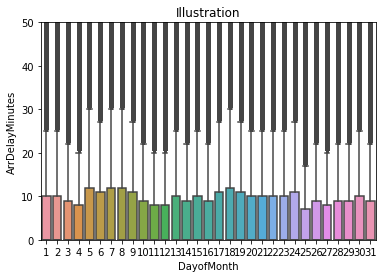

In [ ]:
fig = plt.figure()
axes = sns.boxplot(x = 'DayofMonth', y = 'ArrDelayMinutes', data = df)
#sns.boxplot(x = 'ArrDel15', y = 'ArrDelayMinutes', data = dataset1)
axes.set(ylim=(0, 50))
plt.title('Illustration')
fig.savefig('drive/My Drive/plot.eps', bbox_inches = 'tight')

In [ ]:
# x, y -> ArrDel15

x = df.loc[:, ['DepDel15', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
y = df.loc[:, ['ArrDel15']]
labelencoder_X = LabelEncoder()
x['airport_y'] = labelencoder_X.fit_transform(x['airport_y'])

In [ ]:
# Training and Test set splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# Saving train and test sets as csv files for future use

pd.DataFrame(x_train).to_csv('drive/My Drive/x_train.csv')
pd.DataFrame(x_test).to_csv('drive/My Drive/x_test.csv')
pd.DataFrame(y_train).to_csv('drive/My Drive/y_train.csv')
pd.DataFrame(y_test).to_csv('drive/My Drive/y_test.csv')

In [ ]:
# OVERSAMPLING USING SMOTE

obj = SMOTE(random_state = 0, ratio = 'minority')
x_train, y_train = obj.fit_sample(x_train, y_train.values.ravel())

In [ ]:
#Decision Tree Classifier

print("Arrival Delay : ")
classifier = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
classifier.fit(x_train, y_train)
y_predDTC = classifier.predict(x_test)
print(classification_report(y_test,y_predDTC))

Arrival Delay : 
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    365740
         1.0       0.74      0.77      0.76     97119

    accuracy                           0.90    462859
   macro avg       0.84      0.85      0.85    462859
weighted avg       0.90      0.90      0.90    462859



In [ ]:
#Extra Trees Classifier

print('Arrival Delay : ')
classifier = ExtraTreesClassifier(random_state = 0)
classifier.fit(x_train, y_train)
y_predETC = classifier.predict(x_test)
print(classification_report(y_test, y_predETC))

Arrival Delay : 
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    365740
         1.0       0.79      0.74      0.76     97119

    accuracy                           0.90    462859
   macro avg       0.86      0.84      0.85    462859
weighted avg       0.90      0.90      0.90    462859



In [ ]:
#Logistic Regression

print('Arrival Delay : ')
classifier = LogisticRegression(random_state = 0, max_iter = 200, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5)
classifier.fit(x_train, y_train)
y_predLR = classifier.predict(x_test)
print(classification_report(y_test, y_predLR))

Arrival Delay : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    365740
         1.0       0.79      0.76      0.77     97119

    accuracy                           0.91    462859
   macro avg       0.86      0.85      0.86    462859
weighted avg       0.90      0.91      0.90    462859



In [ ]:
#XGBoost Classifier

print('Arrival Delay : ')
xg = xgb.XGBClassifier(max_depth = 10, learning_rate = 0.05, random_state = 0)
xg.fit(x_train, y_train)
y_predXG = xg.predict(x_test)
print(classification_report(y_test, y_predXG))

Arrival Delay : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    438928
         1.0       0.79      0.75      0.77    116502

    accuracy                           0.91    555430
   macro avg       0.86      0.85      0.85    555430
weighted avg       0.90      0.91      0.90    555430



In [ ]:
# Feature Scaling using Standard Scaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)